In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from business_calendar import Calendar, MO, TU, WE, TH, FR
import datetime

plt.rcParams["font.sans-serif"] = ["simhei"]

In [2]:
with open("drugsInfo_2018.jl", "rb") as f:
    data = [json.loads(line.strip()) for line in f.readlines()]

df = pd.DataFrame(data)
df.rec_date = pd.to_datetime(df.rec_date)
df.head()

,app_no,app_type,corp_name,drug_name,drug_type,inv_type,rec_date
0,JYHB1801291,补充申请,AstraZeneca AB AstraZeneca Pharmaceuticals LP ...,沙格列汀片,化药,,2018-10-29
1,CYHS1800384,仿制,江西青峰药业有限公司,富马酸替诺福韦艾拉酚胺片,化药,3,2018-10-29
2,JYHB1801292,补充申请,AstraZeneca AB AstraZeneca Pharmaceuticals LP ...,沙格列汀片,化药,,2018-10-29
3,JYHB1801278,补充申请,无 无 北京诺华制药有限公司,注射用唑来膦酸浓溶液,化药,,2018-10-29
4,CYSB1800231,补充申请,北京凯因科技股份有限公司,重组人干扰素α2b阴道泡腾片,治疗用生物制品,,2018-10-29


In [3]:
cleaned = df[df.rec_date.notnull()]
cleaned = cleaned.drop_duplicates(['app_no'])
cleaned.head()

,app_no,app_type,corp_name,drug_name,drug_type,inv_type,rec_date
0,JYHB1801291,补充申请,AstraZeneca AB AstraZeneca Pharmaceuticals LP ...,沙格列汀片,化药,,2018-10-29
1,CYHS1800384,仿制,江西青峰药业有限公司,富马酸替诺福韦艾拉酚胺片,化药,3,2018-10-29
2,JYHB1801292,补充申请,AstraZeneca AB AstraZeneca Pharmaceuticals LP ...,沙格列汀片,化药,,2018-10-29
3,JYHB1801278,补充申请,无 无 北京诺华制药有限公司,注射用唑来膦酸浓溶液,化药,,2018-10-29
4,CYSB1800231,补充申请,北京凯因科技股份有限公司,重组人干扰素α2b阴道泡腾片,治疗用生物制品,,2018-10-29


In [4]:
drug_type = df[df.drug_type.notnull()].drug_type.value_counts()
drug_type.head()

化药         54615
治疗用生物制品     6169
中药           356
预防用生物制品      127
药用辅料          29
Name: drug_type, dtype: int64

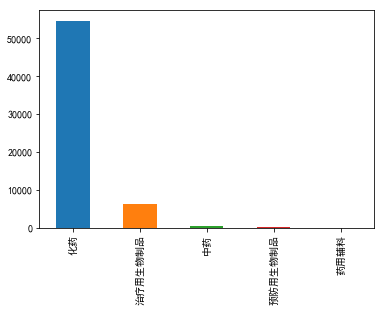

In [5]:
drug_type[:5].plot(kind='bar')
plt.show()

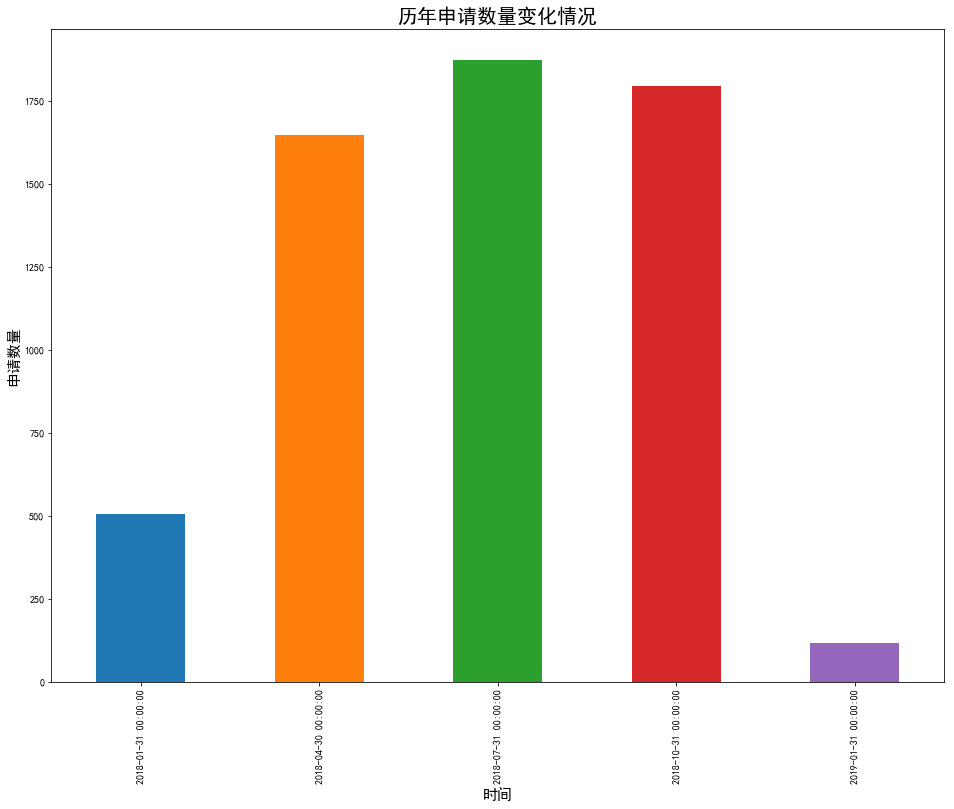

In [6]:
cleaned.rec_date.value_counts().resample('3M').sum().plot(figsize = (16, 12), kind= 'bar')
plt.xlabel(u'时间', fontsize = 15)
plt.ylabel(u'申请数量', fontsize = 15)
plt.title(u'历年申请数量变化情况', fontsize = 20)
#plt.xlim('20101231', '20171231')
#plt.legend()

plt.show()

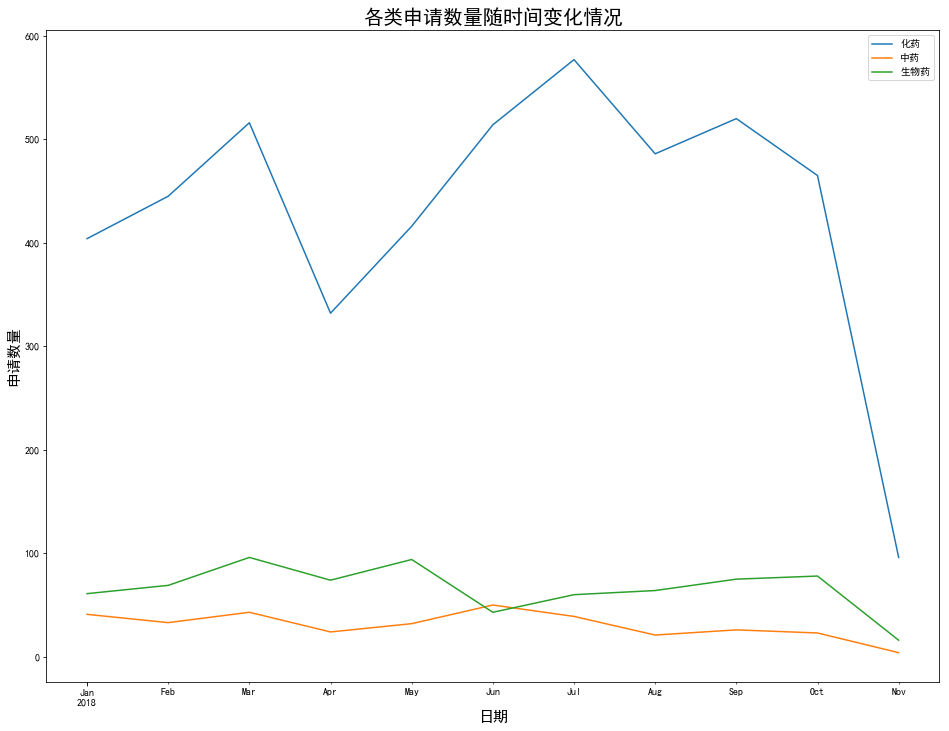

In [7]:
c_drug = cleaned[cleaned.drug_type == u'化药']
z_drug = cleaned[cleaned.drug_type == u'中药']
s_drug = cleaned[cleaned.drug_type.str.contains(u'生物制品')]

c_drug.rec_date.value_counts().resample('M').sum().plot(figsize = (16, 12), label = u'化药')
z_drug.rec_date.value_counts().resample('M').sum().plot(figsize = (16, 12), label = u'中药')
s_drug.rec_date.value_counts().resample('M').sum().plot(figsize = (16, 12), label = u'生物药')
#time_cnt.resample('M').sum().plot(figsize = (16, 12), label = u'全部申请')

#plt.xlim('201401', '201712')

plt.xlabel(u'日期', fontsize = 15)
plt.ylabel(u'申请数量', fontsize = 15)
plt.title(u'各类申请数量随时间变化情况', fontsize = 20)
plt.legend()
plt.savefig(u'各类申请数量随时间变化情况.jpg')
plt.show()

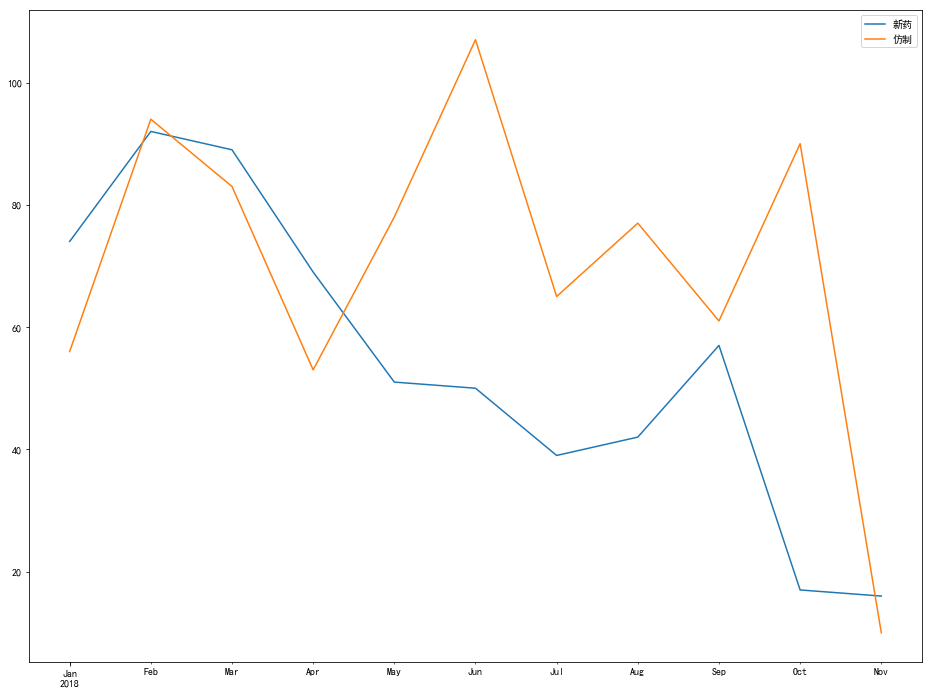

In [9]:
cleaned[cleaned.app_type == u'新药'].rec_date.value_counts().resample('M').sum().plot(figsize = (16, 12), label = u'新药')
cleaned[cleaned.app_type == u'仿制'].rec_date.value_counts().resample('M').sum().plot(figsize = (16, 12), label = u'仿制')
#cleaned[cleaned.app_type == u'复审'].rec_date.value_counts().resample('M').sum().plot(figsize = (16, 12), label = u'复审')
#time_cnt.resample('M').sum().plot(figsize = (16, 12), label = u'全部申请')
#plt.xlim('200010', '201712')
plt.legend()
plt.show()

In [10]:
cleaned[(cleaned.inv_type == '1') | (cleaned.inv_type == '1.1')].corp_name.value_counts()[:20]

广东东阳光药业有限公司                                                     12
AbbVie Inc. AbbVie Inc. 艾伯维医药贸易（上海）有限公司                          9
基石药业（苏州）有限公司 拓石药业（上海）有限公司                                        7
苏州亚盛药业有限公司                                                       6
Novartis Pharma AG Novartis Pharma AG 诺华（中国）生物医学研究有限公司           6
益方生物科技（上海）有限公司                                                   6
Arena Pharmaceuticals, Inc. Corden Pharma GmbH 云屹药业（上海）有限公司      6
哈尔滨珍宝制药有限公司 哈尔滨珍宝制药有限公司                                          6
苏州润新生物科技有限公司                                                     6
亚宝药业集团股份有限公司 亚宝药业集团股份有限公司 苏州亚宝药物研发有限公司                           5
广东众生药业股份有限公司 广东众生药业股份有限公司                                        4
Merck Sharp & Dohme Corp. Bayer Pharma AG 默沙东研发（中国）有限公司          4
Novartis Pharma AG Novartis Pharma Stein AG 诺华（中国）生物医学研究有限公司     4
四川科伦博泰生物医药股份有限公司 四川科伦博泰生物医药股份有限公司                                4
南京圣和药业股份有限公司 南京圣和药业股份有限公司                                     

In [12]:
ind = pd.read_csv("ind.csv", encoding='utf-8')
ind

,受理号,药品名称,申请人名称,适应症
0,JXHL1800101,MK-7264,Merck Sharp & Dohme Corp.;MSD International Gm...,用于治疗难治性或不明原因的慢性咳嗽
1,JXHL1800102,MK-7264,Merck Sharp & Dohme Corp.;MSD International Gm...,呼吸系统疾病及抗过敏药物
2,JXSL1800020,HBM9161(HL161BKN)注射液,Harbour BioMed Therapeutics Limited;Vetter Dev...,神经系统疾病药物
3,JXHL1800096,Aprocitentan片,Idorsia Pharmaceuticals Ltd;Excella GmbH & Co....,难治性高血压
4,JXHL1800097,Aprocitentan片,Idorsia Pharmaceuticals Ltd;Excella GmbH & Co....,难治性高血压
5,CXHL1800125,SC1011片,无锡智康弘仁新药开发有限公司,呼吸系统疾病及抗过敏药物
6,CXHL1800126,SC1011片,无锡智康弘仁新药开发有限公司,呼吸系统疾病及抗过敏药物
7,JXSL1800028,阿达木单抗注射液,AbbVie Deutschland GmbH & Co.KG;Vetter Pharma-...,皮肤及五官科药物


In [14]:
ind.columns = ['app_no', 'drug_name', 'corp_name', 'conditions']

In [21]:
x = pd.merge(ind, cleaned, on=['app_no', 'drug_name'])

In [22]:
x.columns

Index(['app_no', 'drug_name', 'corp_name_x', 'conditions', 'app_type',
       'corp_name_y', 'drug_type', 'inv_type', 'rec_date'],
      dtype='object')

In [25]:
x = x.drop(columns=['corp_name_y'])

In [29]:
x.columns = ['申请号', '药品名称', '申请人名称','适应症',  '申请类型', '药品类型', '注册分类', '承办日期']

In [30]:
x

,申请号,药品名称,申请人名称,适应症,申请类型,药品类型,注册分类,承办日期
0,JXHL1800101,MK-7264,Merck Sharp & Dohme Corp.;MSD International Gm...,用于治疗难治性或不明原因的慢性咳嗽,进口,化药,1,2018-08-23
1,JXHL1800102,MK-7264,Merck Sharp & Dohme Corp.;MSD International Gm...,呼吸系统疾病及抗过敏药物,进口,化药,1,2018-08-23
2,JXSL1800020,HBM9161(HL161BKN)注射液,Harbour BioMed Therapeutics Limited;Vetter Dev...,神经系统疾病药物,进口,治疗用生物制品,,2018-08-16
3,JXHL1800096,Aprocitentan片,Idorsia Pharmaceuticals Ltd;Excella GmbH & Co....,难治性高血压,进口,化药,1,2018-08-15
4,JXHL1800097,Aprocitentan片,Idorsia Pharmaceuticals Ltd;Excella GmbH & Co....,难治性高血压,进口,化药,1,2018-08-15
5,CXHL1800125,SC1011片,无锡智康弘仁新药开发有限公司,呼吸系统疾病及抗过敏药物,新药,化药,1,2018-08-15
6,CXHL1800126,SC1011片,无锡智康弘仁新药开发有限公司,呼吸系统疾病及抗过敏药物,新药,化药,1,2018-08-15
7,JXSL1800028,阿达木单抗注射液,AbbVie Deutschland GmbH & Co.KG;Vetter Pharma-...,皮肤及五官科药物,进口,治疗用生物制品,,2018-09-05


In [37]:
x['公示日期'] = pd.datetime(2018,11,5)

In [38]:
x

,申请号,药品名称,申请人名称,适应症,申请类型,药品类型,注册分类,承办日期,公示日期,间隔工作日
0,JXHL1800101,MK-7264,Merck Sharp & Dohme Corp.;MSD International Gm...,用于治疗难治性或不明原因的慢性咳嗽,进口,化药,1,2018-08-23,2018-11-05,-31
1,JXHL1800102,MK-7264,Merck Sharp & Dohme Corp.;MSD International Gm...,呼吸系统疾病及抗过敏药物,进口,化药,1,2018-08-23,2018-11-05,-31
2,JXSL1800020,HBM9161(HL161BKN)注射液,Harbour BioMed Therapeutics Limited;Vetter Dev...,神经系统疾病药物,进口,治疗用生物制品,,2018-08-16,2018-11-05,-36
3,JXHL1800096,Aprocitentan片,Idorsia Pharmaceuticals Ltd;Excella GmbH & Co....,难治性高血压,进口,化药,1,2018-08-15,2018-11-05,-37
4,JXHL1800097,Aprocitentan片,Idorsia Pharmaceuticals Ltd;Excella GmbH & Co....,难治性高血压,进口,化药,1,2018-08-15,2018-11-05,-37
5,CXHL1800125,SC1011片,无锡智康弘仁新药开发有限公司,呼吸系统疾病及抗过敏药物,新药,化药,1,2018-08-15,2018-11-05,-37
6,CXHL1800126,SC1011片,无锡智康弘仁新药开发有限公司,呼吸系统疾病及抗过敏药物,新药,化药,1,2018-08-15,2018-11-05,-37
7,JXSL1800028,阿达木单抗注射液,AbbVie Deutschland GmbH & Co.KG;Vetter Pharma-...,皮肤及五官科药物,进口,治疗用生物制品,,2018-09-05,2018-11-05,-22


In [39]:
x['间隔工作日'] = x.apply(lambda days:Calendar().busdaycount(days['承办日期'], days['公示日期']), axis=1)

In [40]:
x

,申请号,药品名称,申请人名称,适应症,申请类型,药品类型,注册分类,承办日期,公示日期,间隔工作日
0,JXHL1800101,MK-7264,Merck Sharp & Dohme Corp.;MSD International Gm...,用于治疗难治性或不明原因的慢性咳嗽,进口,化药,1,2018-08-23,2018-11-05,52
1,JXHL1800102,MK-7264,Merck Sharp & Dohme Corp.;MSD International Gm...,呼吸系统疾病及抗过敏药物,进口,化药,1,2018-08-23,2018-11-05,52
2,JXSL1800020,HBM9161(HL161BKN)注射液,Harbour BioMed Therapeutics Limited;Vetter Dev...,神经系统疾病药物,进口,治疗用生物制品,,2018-08-16,2018-11-05,57
3,JXHL1800096,Aprocitentan片,Idorsia Pharmaceuticals Ltd;Excella GmbH & Co....,难治性高血压,进口,化药,1,2018-08-15,2018-11-05,58
4,JXHL1800097,Aprocitentan片,Idorsia Pharmaceuticals Ltd;Excella GmbH & Co....,难治性高血压,进口,化药,1,2018-08-15,2018-11-05,58
5,CXHL1800125,SC1011片,无锡智康弘仁新药开发有限公司,呼吸系统疾病及抗过敏药物,新药,化药,1,2018-08-15,2018-11-05,58
6,CXHL1800126,SC1011片,无锡智康弘仁新药开发有限公司,呼吸系统疾病及抗过敏药物,新药,化药,1,2018-08-15,2018-11-05,58
7,JXSL1800028,阿达木单抗注射液,AbbVie Deutschland GmbH & Co.KG;Vetter Pharma-...,皮肤及五官科药物,进口,治疗用生物制品,,2018-09-05,2018-11-05,43


In [43]:
cleaned[(cleaned.rec_date > '20180823') & (cleaned.app_no.str.contains('X'))].sort_values(by='rec_date').drop_duplicates(subset='drug_name')

,app_no,app_type,corp_name,drug_name,drug_type,inv_type,rec_date
60824,JXSL1800022,进口,"天境生物科技香港有限公司 Binex Co., Ltd. 天境生物科技（上海）有限公司",TJ107注射液,治疗用生物制品,,2018-08-27
60173,CXHL1800132,新药,广东东阳光药业有限公司,HEC53856胶囊,化药,1,2018-08-27
60176,CXHL1800129,新药,广东东阳光药业有限公司,HEC53856,化药,1,2018-08-27
60086,CXHB1800062,补充申请,浙江海正药业股份有限公司 浙江海正药业股份有限公司,海泽麦布阿托伐他汀钙片,化药,,2018-08-27
60171,CXSS1800018,新药,百奥泰生物科技（广州）有限公司 百奥泰生物科技（广州）有限公司,阿达木单抗注射液,治疗用生物制品,2,2018-08-27
60172,JXHL1800108,进口,Pfizer Inc. Hospira Australia Pty Ltd 辉瑞制药有限公司,注射用氨曲南阿维巴坦,化药,2.3,2018-08-27
60820,JXHL1800110,进口,"Celgene International II Sarl Patheon, Inc. 新基...",Ozanimod胶囊,化药,1,2018-08-28
60219,CXHS1800023,新药,常州合全药业有限公司 百济神州（苏州）生物科技有限公司,赞布替尼,化药,1,2018-08-29
60220,CXHS1800024,新药,百济神州（苏州）生物科技有限公司 百济神州（苏州）生物科技有限公司,赞布替尼胶囊,化药,1,2018-08-29
60222,CXHL1800133,新药,四川海思科制药有限公司 四川海思科制药有限公司 辽宁海思科制药有限公司 海思科医药集团股份有限公司,HSK16149,化药,1,2018-08-29
